In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['scatter.marker'] = "x"

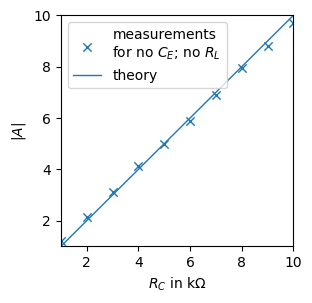

In [62]:
#II.Verstärkung der Emitterschaltung
#5.5kHz 

#1. Messung mit C_E und ohne R_L
rLOhm = 10000
rEOhm = 1000

U_E = 20.4 #mV
Widerstand_mitCE_ohne_RL = np.array([1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6, 7, 8, 9, 10])
#in kiloohm
U_A_mitCE_ohne_RL = np.array([0.456, 0.644, 0.856, 1.07, 1.27, 1.46, 1.66, 1.84, 2.10, 2.46, 2.88, 3.28, 3.64, 4.08]) * 1000.0

# 2. Messung ohne C_E und ohne R_L 
#U_E = 20.4 #mV, also gleich wie davor
Widerstand_ohneCE_ohne_RL = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
U_A_OhneCE_Ohne_RL = np.array([24.4, 43.6,  63.2, 84, 102, 120,  141, 162, 180, 198])

#3. Messung mit C_E und mit R_L = 10kOhm

#U_E = 20.4 #mV, also gleich wie davor
Widerstand_mitCE_mit_RL = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
U_A_mitCE_mit_RL = np.array([0.404, 0.7, 0.960, 1.18, 1.38, 1.56, 1.68, 1.84, 1.94, 2.06]) * 1000.0 #V

def createMessdatenPack(uE, uA, rInKiloOhm):
    return {
        "amplify": uA / uE,
        "r": rInKiloOhm * 1000
    }

messdatenpackMitCEOhneRL = createMessdatenPack(U_E, U_A_mitCE_ohne_RL, Widerstand_mitCE_ohne_RL)
messdatepackOhneCEOhneRL = createMessdatenPack(U_E, U_A_OhneCE_Ohne_RL, Widerstand_ohneCE_ohne_RL)
messdatenpackMitCEMitRL = createMessdatenPack(U_E, U_A_mitCE_mit_RL, Widerstand_mitCE_mit_RL)

def addMessdatenToPlot(messdatenPack, label):
    plt.figure(figsize=(3,3))
    plt.scatter(messdatenPack["r"] / 1000.0, messdatenPack["amplify"], label=label)
    plt.xlabel(r"$R_C$ in k$\Omega$")
    plt.ylabel(r"$\vert A \vert$")

#addMessdatenToPlot(messdatenpackMitCEOhneRL, "Mit CE; ohne RL")
addMessdatenToPlot(messdatepackOhneCEOhneRL, "measurements\nfor no $C_E$; no $R_L$")

def parallel(a, b):
    return 1 / (1/a + 1/b)

def parallel3(a,b,c):
    return 1/ (1/a + 1/b + 1/c)

linsp = np.linspace(0, 10000, 500)

plt.plot(linsp / 1000.0, np.ones_like(linsp) * linsp/rEOhm, label="theory")
#addMessdatenToPlot(messdatenpackMitCEMitRL, "Mit CE; mit RL")


plt.xlim(1,10)
plt.ylim(1,10)

plt.legend()

C:\Users\OGDBETKO\AppData\Local\Temp\ipykernel_23908\3797837869.py:44: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1/a + 1/b)


<Figure size 300x300 with 0 Axes>

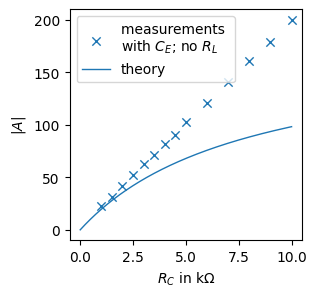

In [83]:
#### 1)   MIT CE    OHNE RL

plt.figure(figsize=(3,3))

s = 0.0221
rCEOhm = 8000.0
def calcAWithCENoRL(x):
    return s * parallel(rCEOhm, x)

addMessdatenToPlot(messdatenpackMitCEOhneRL, label="measurements \nwith $C_E$; no $R_L$")
plt.plot(linsp/1000, calcAWithCENoRL(linsp), label="theory")
plt.legend()

C:\Users\OGDBETKO\AppData\Local\Temp\ipykernel_23908\3797837869.py:47: RuntimeWarning: divide by zero encountered in divide
  return 1/ (1/a + 1/b + 1/c)


<Figure size 300x300 with 0 Axes>

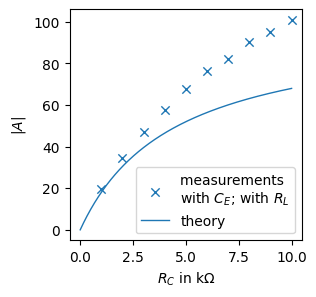

In [84]:
#### 3) With CE with RL
plt.figure(figsize=(3,3))
def calcAWithCEWithRL(x):
    return s * parallel3(x, rLOhm, rCEOhm)
addMessdatenToPlot(messdatenpackMitCEMitRL, label="measurements \nwith $C_E$; with $R_L$")
plt.plot(linsp/1000, calcAWithCEWithRL(linsp), label="theory")
plt.legend()

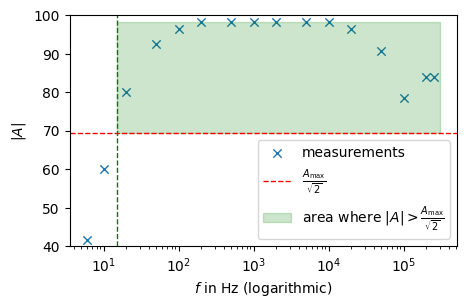

In [87]:
####### Aufgabe 9
#III Messung der Phasenverschiebung
plt.figure(figsize=(5,3))
frequenz_Phasenversch = np.array([6, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 250000]) #in Hz

U_E_Phasenversch = np.array([12.8, 15.2, 20.0, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.2, 20.4, 20.0, 20.0 ]) 

U_A_Phasenversch = 1000 * np.array([0.532, 0.914, 1.6, 2.0, 2.08, 2.12, 2.12, 2.12, 2.12, 2.12, 2.12, 2.08, 1.92, 1.6, 1.68, 1.68]) # V

Phasenwinkel_Phasenversch = np.array([56, 34, 20, 8.8, 4.8, 2.4, 0.960, 0.48, 0.256, 0.1004, 0.05, 0.027, 0.0112, 0.006, 0.0058, 0.0058 ]) # in milli sekunden
amplification_Phasenversch = U_A_Phasenversch / U_E_Phasenversch

maxAmplification = np.max(amplification_Phasenversch)
plt.scatter(frequenz_Phasenversch, amplification_Phasenversch, label="measurements")
plt.xscale("log")
plt.xlabel("$f$ in Hz (logarithmic)")
plt.ylabel(r"$\vert A \vert$")
plt.axhline(maxAmplification / np.sqrt(2), color='r', linestyle='--', label=r'$\frac{A_\text{max}}{\sqrt{2}}$')

plt.fill_betweenx([maxAmplification/np.sqrt(2), maxAmplification], 15, 300000, color='green', alpha=0.2, label=r"area where $ \vert A \vert  > \frac{A_\text{max}}{\sqrt{2}}$")
plt.legend()
plt.axvline(x=15, color='g', linestyle='--', label='x = 15')
plt.ylim(40,100)
plt.xscale("log")
plt.show()




Text(0, 0.5, '$\\varphi$ in ms')

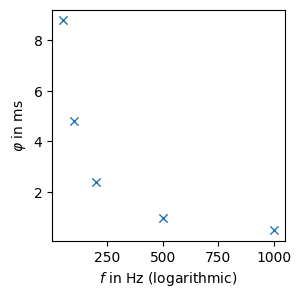

In [100]:
plt.figure(figsize=(3, 3))
plt.scatter(frequenz_Phasenversch[3:8], Phasenwinkel_Phasenversch[3:8], label="Phasenwinkel")
#plt.xscale("log")
plt.xlabel("$f$ in Hz (logarithmic)")
plt.ylabel(r"$\varphi$ in ms")